# Loading the necessary library

In [1]:
import pandas as pd
import pymysql
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Reaing the data

In [2]:
try:
    conn=pymysql.connect(
        host='127.0.0.1',
        user='root',
        passwd='root',
        database='students'
        )
    
    data=pd.read_sql_query("""select * from exams """,con=conn)
except Exception as e:
    print("Can't connect with database")

# Data Preprocessing

In [3]:
data.head()

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [4]:
data.sample(5)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
125,female,group E,some college,standard,none,83,90,88
187,male,group C,some college,standard,none,50,40,44
309,female,group C,some college,standard,none,61,64,54
866,female,group E,some college,standard,completed,82,85,91
458,female,group A,some high school,free/reduced,none,57,70,71


In [5]:
data.dtypes

GENDER                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [6]:
data.shape

(1000, 8)

In [7]:
data.isnull().sum()

GENDER                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
data.select_dtypes('number').describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,67.810000,70.382000,69.140000
std,15.250196,14.107413,15.025917
min,15.000000,25.000000,15.000000
25%,58.000000,61.000000,59.000000
50%,68.000000,70.500000,70.000000
75%,79.250000,80.000000,80.000000
max,100.000000,100.000000,100.000000


In [9]:
data.select_dtypes('object').describe()

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,male,group C,some college,standard,none
freq,508,323,224,660,656


In [10]:
for i in data.select_dtypes('object').columns:
    print(f"unique values in {i} is")
    
    print(data[i].unique())
    
    print(f"Total unique values is {data[i].nunique()}")
    
    print("*"*50)
    print()

unique values in GENDER is
['female' 'male']
Total unique values is 2
**************************************************

unique values in race/ethnicity is
['group D' 'group B' 'group C' 'group E' 'group A']
Total unique values is 5
**************************************************

unique values in parental level of education is
['some college' "associate's degree" 'some high school'
 "bachelor's degree" "master's degree" 'high school']
Total unique values is 6
**************************************************

unique values in lunch is
['standard' 'free/reduced']
Total unique values is 2
**************************************************

unique values in test preparation course is
['completed' 'none']
Total unique values is 2
**************************************************



# Exploratory Data Analysis

### Num columns 

In [11]:
data.head()

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [12]:
data['total']=data['reading score'] + data['writing score'] + data['math score']

# Math Score

In [13]:
data['math score'].describe()

count    1000.000000
mean       67.810000
std        15.250196
min        15.000000
25%        58.000000
50%        68.000000
75%        79.250000
max       100.000000
Name: math score, dtype: float64

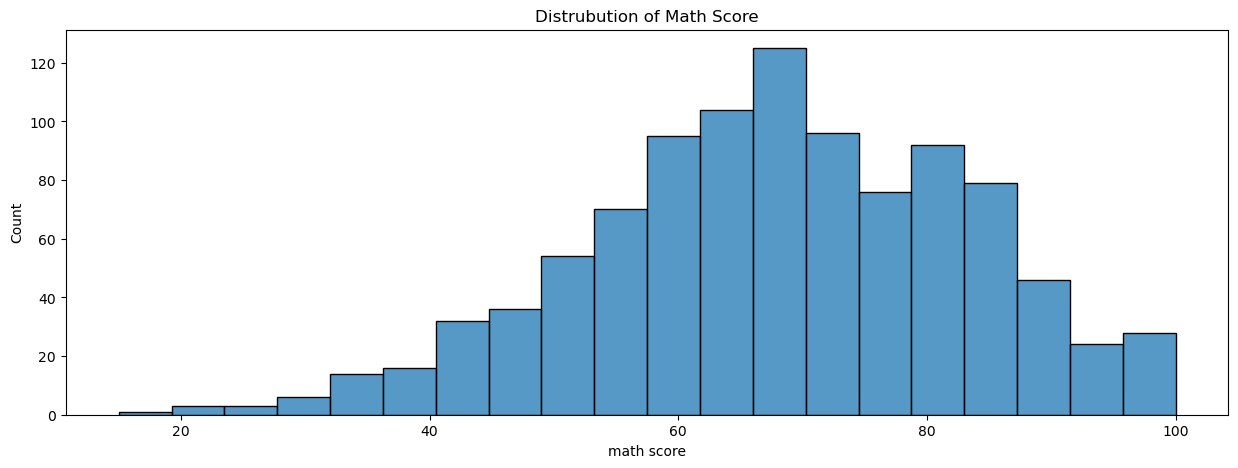

In [14]:
fig,ax=plt.subplots(figsize=(15,5))
plt.title("Distrubution of Math Score")
sns.histplot(data['math score'])
plt.show()

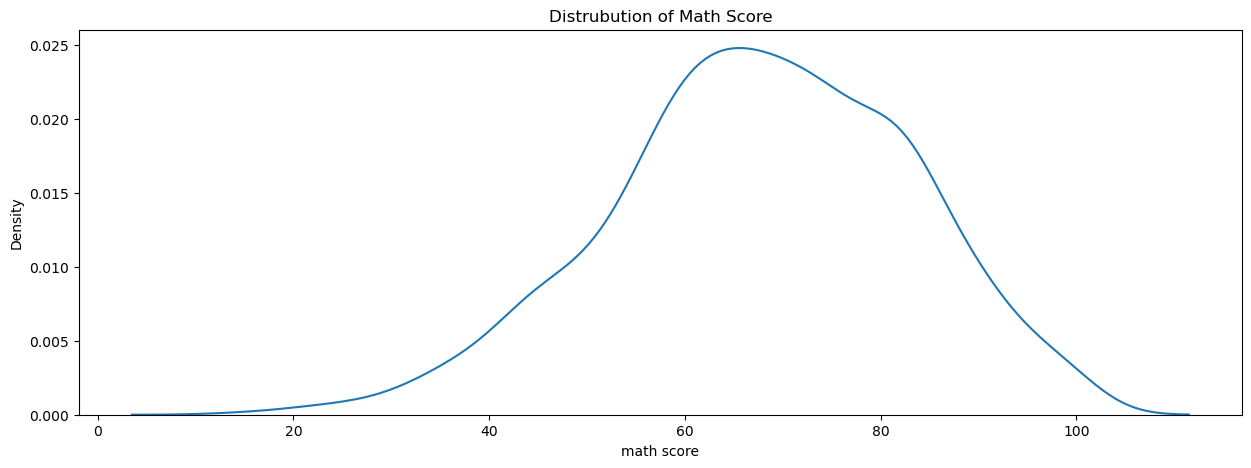

In [15]:
ax,fig=plt.subplots(figsize=(15,5))
plt.title("Distrubution of Math Score")
sns.kdeplot(data['math score'])
plt.show()

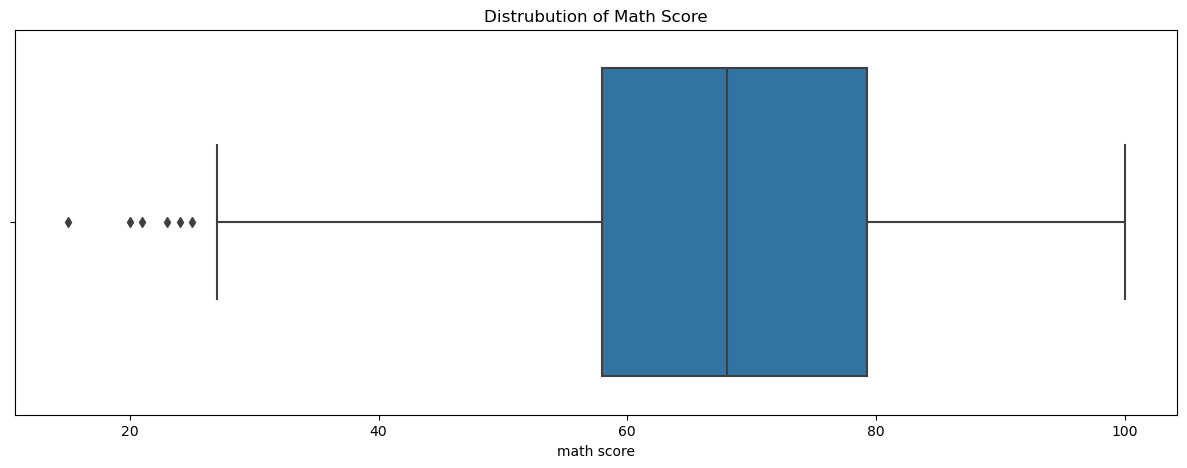

In [16]:
ax,fig=plt.subplots(figsize=(15,5))
plt.title("Distrubution of Math Score")
sns.boxplot(data=data,x='math score')
plt.show()

In [17]:
data.head(2)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276


# Reading Score

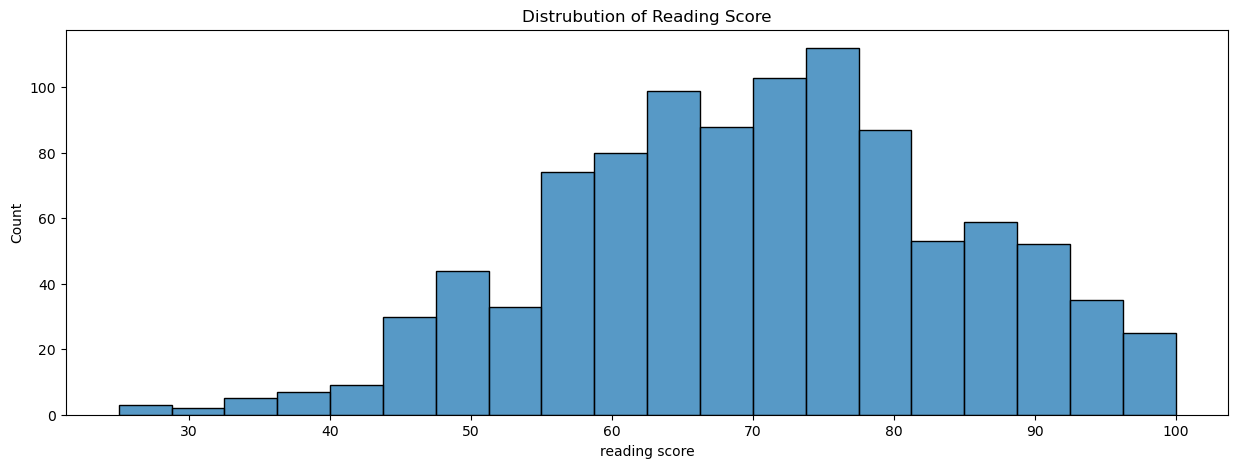

In [18]:
ax,fig=plt.subplots(figsize=(15,5))
plt.title("Distrubution of Reading Score")
sns.histplot(data=data,x='reading score')
plt.show()

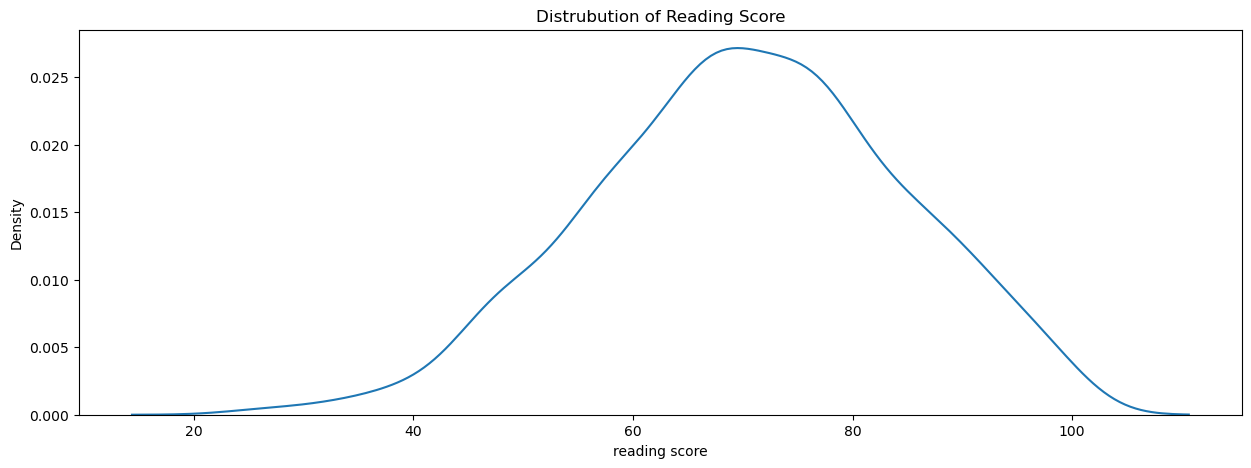

In [19]:
ax,fig=plt.subplots(figsize=(15,5))
plt.title("Distrubution of Reading Score")
sns.kdeplot(data=data,x='reading score')
plt.show()

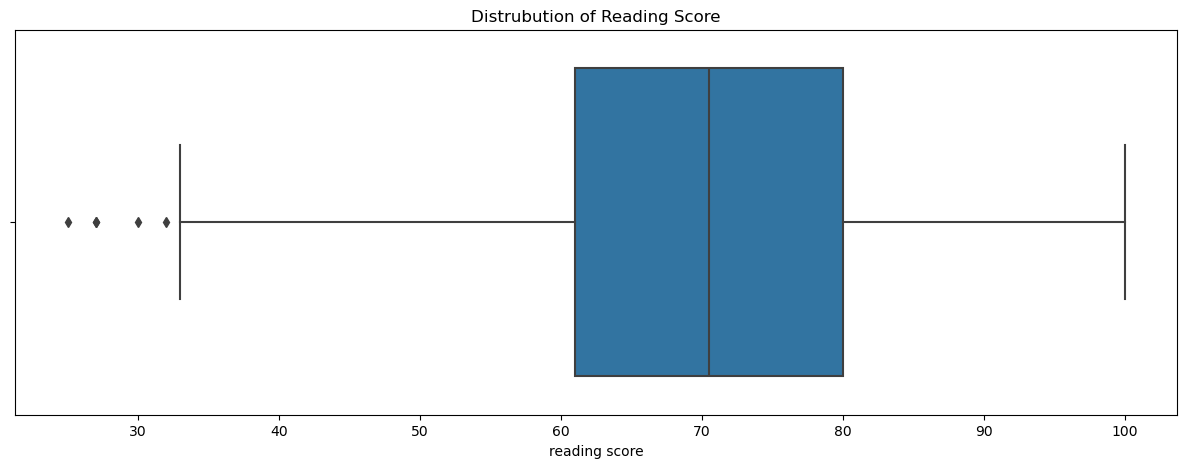

In [20]:
ax,fig=plt.subplots(figsize=(15,5))
plt.title("Distrubution of Reading Score")
sns.boxplot(data=data,x='reading score')
plt.show()

In [21]:
data.head(2)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276


# Writing Score

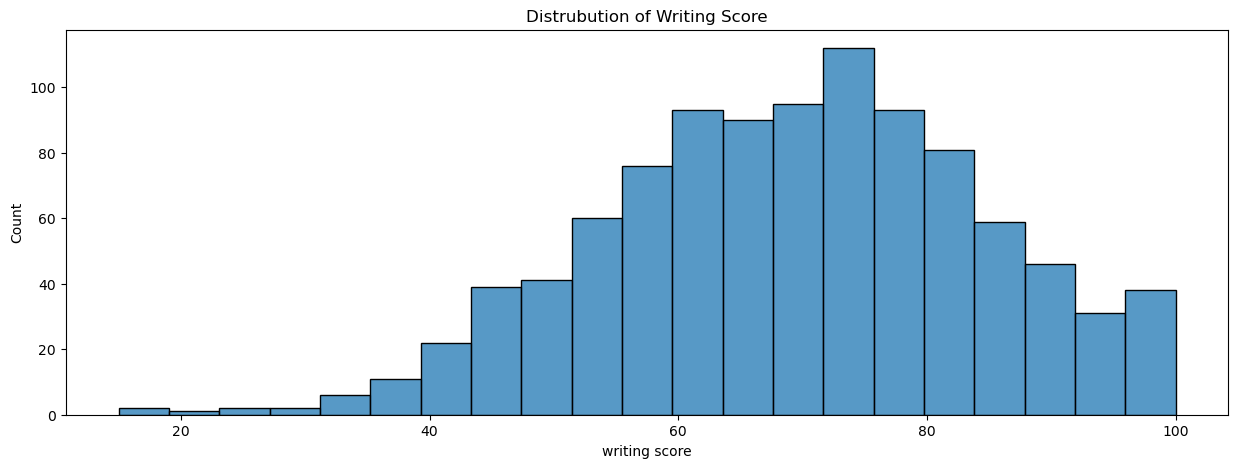

In [22]:
ax,fig=plt.subplots(figsize=(15,5))
plt.title("Distrubution of Writing Score")
sns.histplot(data=data,x='writing score')
plt.show()

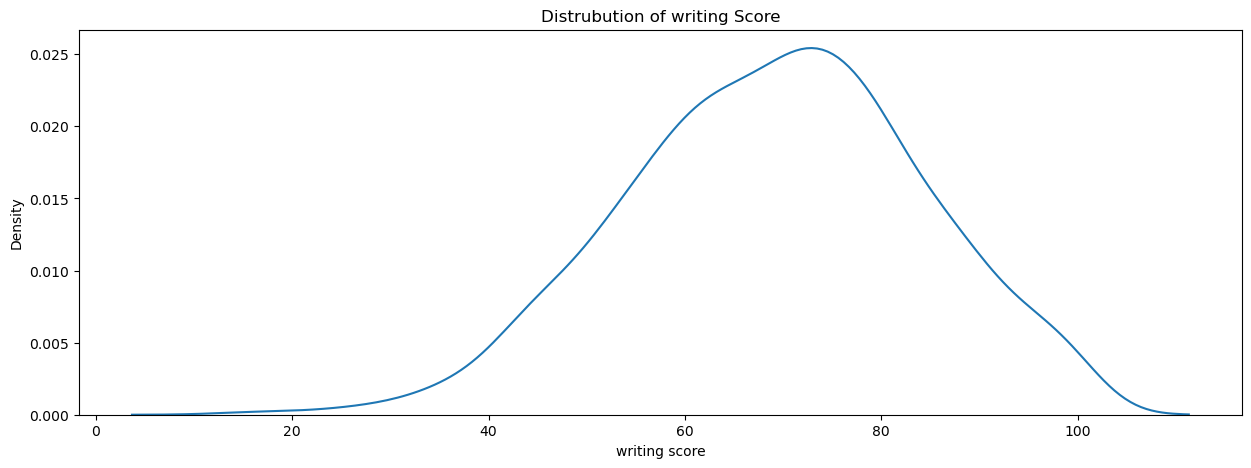

In [23]:
ax,fig=plt.subplots(figsize=(15,5))
plt.title("Distrubution of writing Score")
sns.kdeplot(data=data,x='writing score')
plt.show()

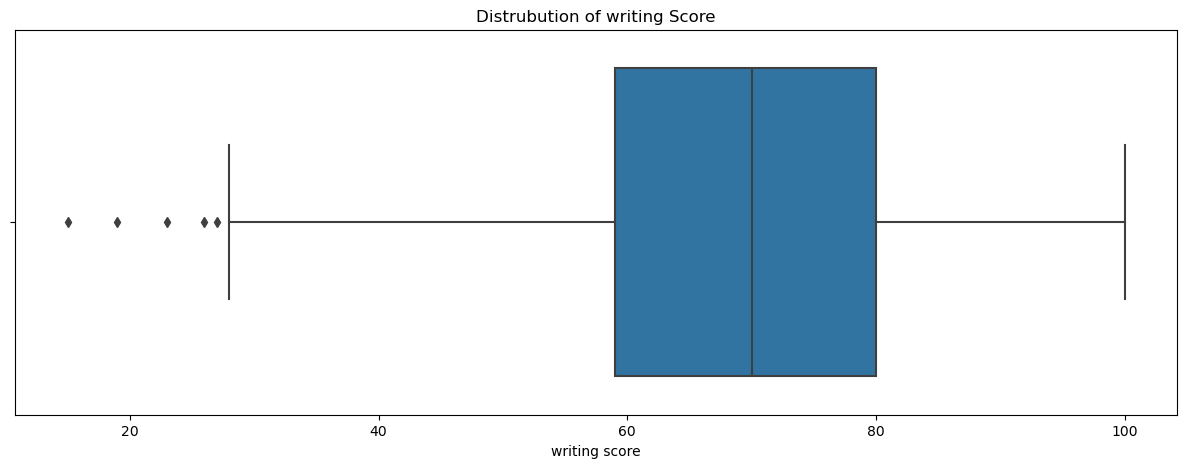

In [24]:
ax,fig=plt.subplots(figsize=(15,5))
plt.title("Distrubution of writing Score")
sns.boxplot(data=data,x='writing score')
plt.show()

In [25]:
data.head(1)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207


# Total

<Axes: title={'center': 'Frequency Distrubution of total'}>

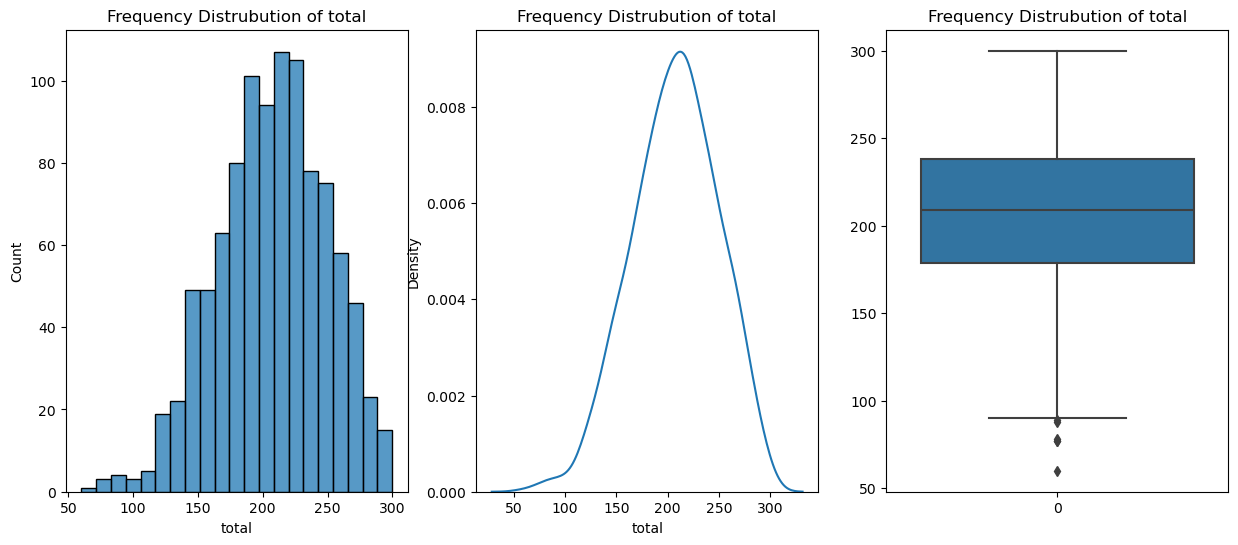

In [26]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(15,6))
ax1.set_title("Frequency Distrubution of total")
sns.histplot(data['total'],ax=ax1)

ax2.set_title("Frequency Distrubution of total")
sns.kdeplot(data['total'],ax=ax2)

ax3.set_title("Frequency Distrubution of total")
sns.boxplot(data['total'],ax=ax3)

In [27]:
data.head(2)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276


# Categorical Columns

### Gender 

In [28]:
data['GENDER'].value_counts()

GENDER
male      508
female    492
Name: count, dtype: int64

In [29]:
# fig,ax=plt.subplots(figsize=(15,5))
# sns.barplot(x=data['gender'].value_counts().index,y=data['gender'].value_counts())
# plt.title("Distrubution of Gender")
# plt.show()

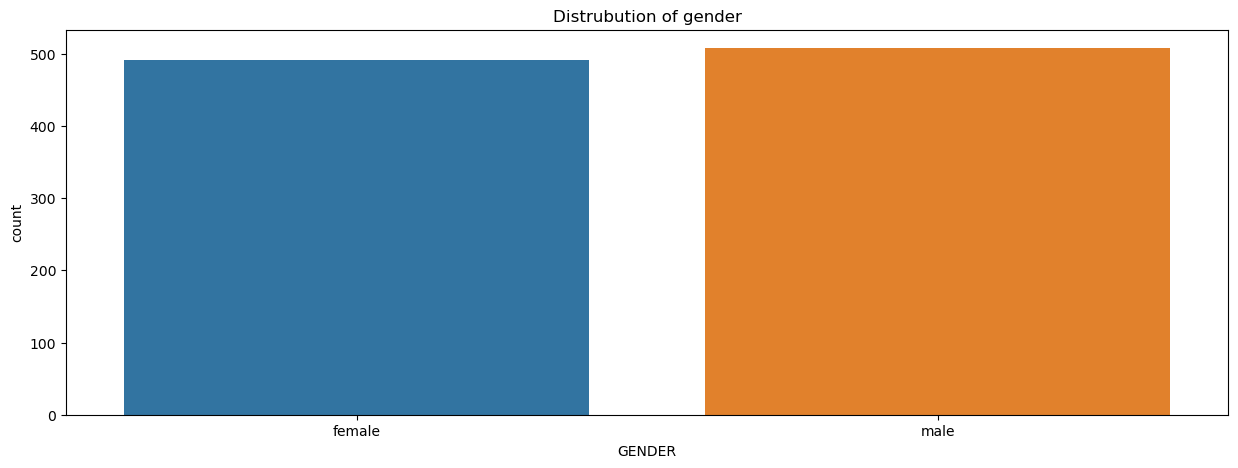

In [30]:
ax,fig=plt.subplots(figsize=(15,5))
sns.countplot(data,x='GENDER')
plt.title("Distrubution of gender")
plt.show()

In [31]:
data['GENDER'].value_counts(normalize=True)

GENDER
male      0.508
female    0.492
Name: proportion, dtype: float64

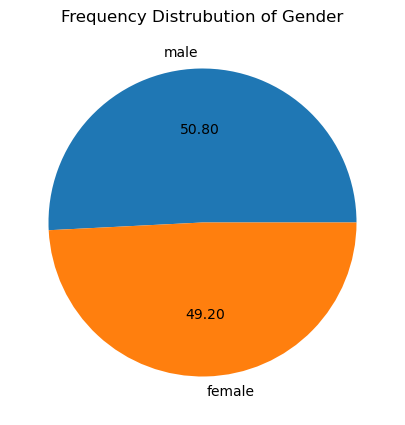

In [32]:
fig,ax=plt.subplots(figsize=(15,5))
plt.title("Frequency Distrubution of Gender")
plt.pie(data['GENDER'].value_counts(normalize=True),labels=data['GENDER'].value_counts(normalize=True).index,autopct='%.2f')
plt.show()

In [33]:
data.head(2)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276


# race/ethnicity

In [34]:
data['race/ethnicity'].value_counts()

race/ethnicity
group C    323
group D    257
group B    198
group E    143
group A     79
Name: count, dtype: int64

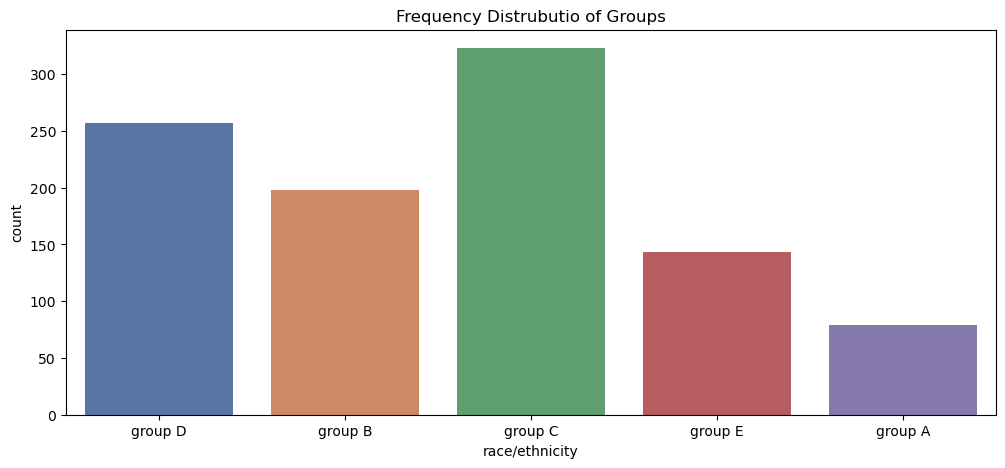

In [35]:
fig,ax=plt.subplots(figsize=(12,5))
plt.title("Frequency Distrubutio of Groups")
sns.countplot(data=data,x='race/ethnicity',palette='deep')
plt.show()

In [36]:
data['race/ethnicity'].value_counts(normalize=True)

race/ethnicity
group C    0.323
group D    0.257
group B    0.198
group E    0.143
group A    0.079
Name: proportion, dtype: float64

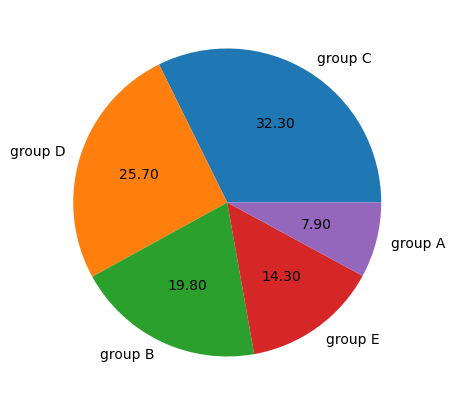

In [37]:
fig,ax=plt.subplots(figsize=(15,5))
plt.pie(data['race/ethnicity'].value_counts(normalize=True),
        labels=data['race/ethnicity'].value_counts(normalize=True).index,
       autopct='%.2f')
plt.show()

# parental level of education

In [38]:
data.head(1)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207


In [39]:
data['parental level of education'].value_counts()

parental level of education
some college          224
high school           215
associate's degree    204
some high school      177
bachelor's degree     105
master's degree        75
Name: count, dtype: int64

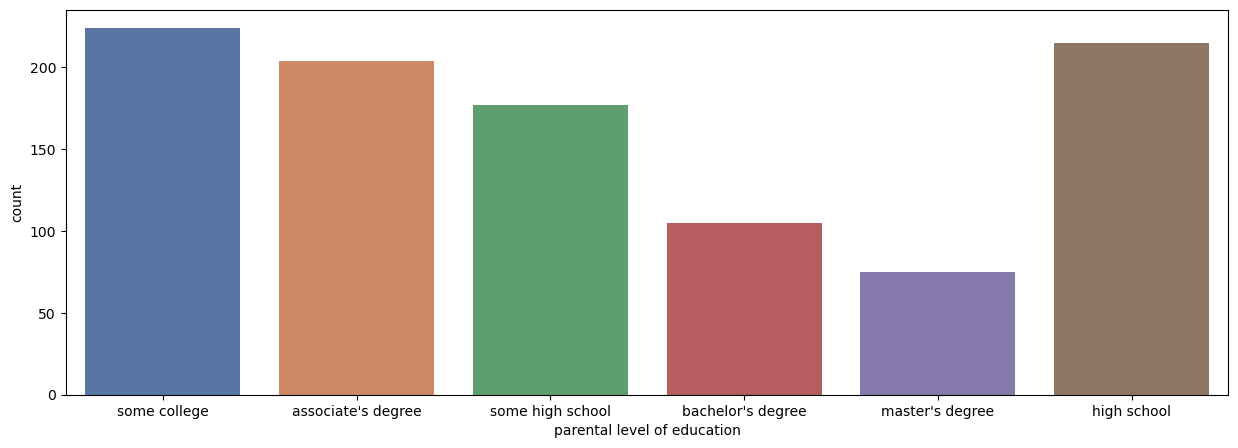

In [40]:
fig,ax=plt.subplots(figsize=(15,5))
sns.countplot(data=data,x='parental level of education',palette='deep')
plt.show()

In [41]:
data['parental level of education'].value_counts(normalize=True)

parental level of education
some college          0.224
high school           0.215
associate's degree    0.204
some high school      0.177
bachelor's degree     0.105
master's degree       0.075
Name: proportion, dtype: float64

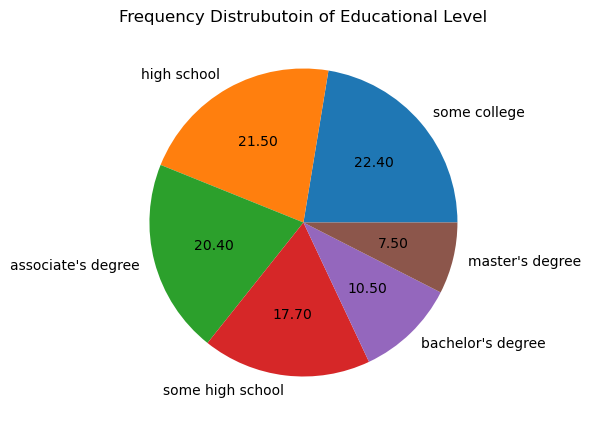

In [42]:
fig,ax=plt.subplots(figsize=(15,5))
plt.title("Frequency Distrubutoin of Educational Level")
plt.pie(data['parental level of education'].value_counts(normalize=True),
       labels=data['parental level of education'].value_counts().index,
       autopct='%.2f')
plt.show()

# Lunch

In [43]:
data.head(2)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276


In [44]:
data['lunch'].value_counts()

lunch
standard        660
free/reduced    340
Name: count, dtype: int64

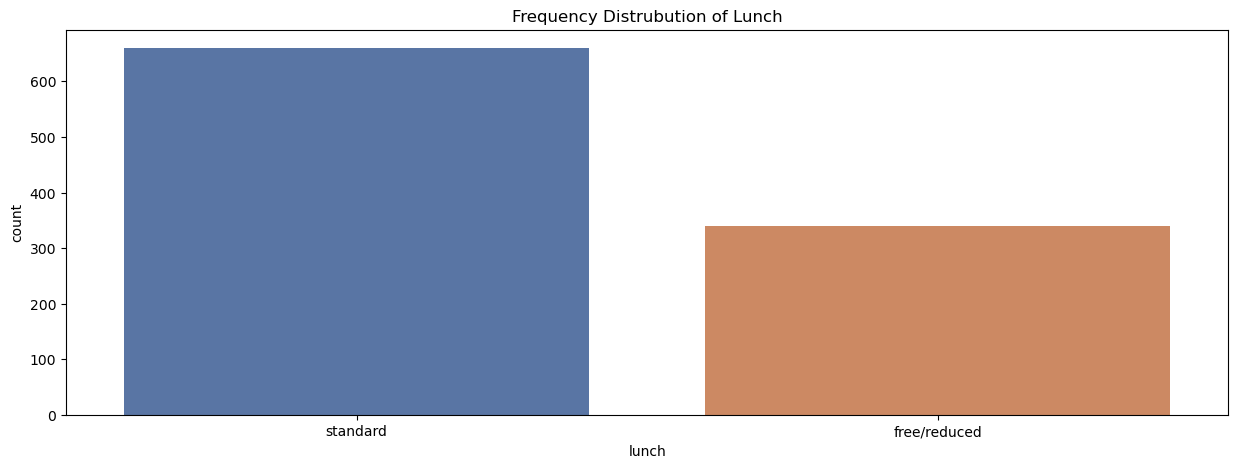

In [45]:
fig,ax=plt.subplots(figsize=(15,5))
plt.title('Frequency Distrubution of Lunch')
sns.countplot(data=data,x='lunch',palette='deep')
plt.show()

In [46]:
data['lunch'].value_counts(normalize=True)*100

lunch
standard        66.0
free/reduced    34.0
Name: proportion, dtype: float64

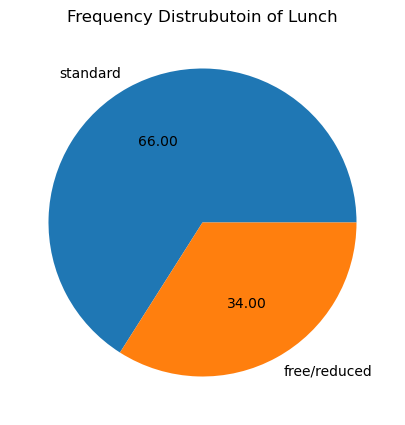

In [47]:
fig,ax=plt.subplots(figsize=(15,5))
plt.title("Frequency Distrubutoin of Lunch")
plt.pie(data['lunch'].value_counts(normalize=True),
       labels=data['lunch'].value_counts().index,
       autopct='%.2f')
plt.show()

# Test Preparation

In [48]:
data.head(1)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207


In [49]:
data['test preparation course'].value_counts()

test preparation course
none         656
completed    344
Name: count, dtype: int64

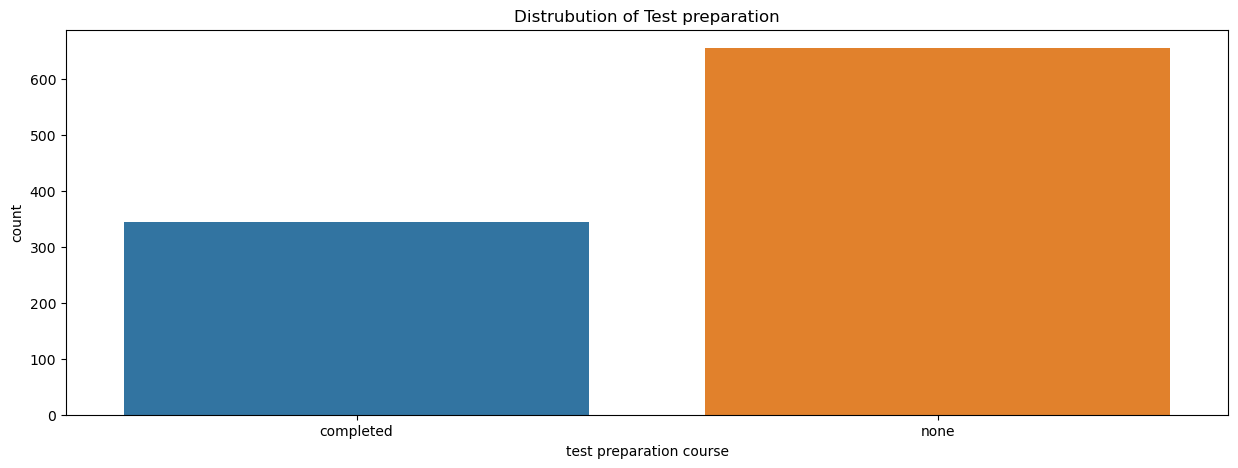

In [50]:
fig,ax=plt.subplots(figsize=(15,5))
plt.title("Distrubution of Test preparation")
sns.countplot(data=data,x='test preparation course')
plt.show()

In [51]:
data['test preparation course'].value_counts(normalize=True)*100

test preparation course
none         65.6
completed    34.4
Name: proportion, dtype: float64

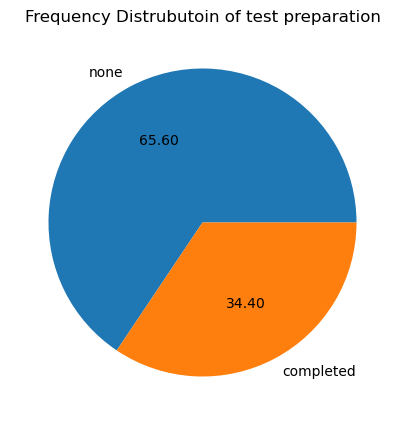

In [52]:
fig,ax=plt.subplots(figsize=(15,5))
plt.title("Frequency Distrubutoin of test preparation")
plt.pie(data['test preparation course'].value_counts(normalize=True),
       labels=data['test preparation course'].value_counts().index,
       autopct='%.2f')
plt.show()

# Bivariate Analysis

### Cat-Cat 

In [53]:
data.head(1)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207


In [54]:
x=data.groupby(['GENDER'])['race/ethnicity'].value_counts().reset_index()
x

,GENDER,race/ethnicity,count
0,female,group C,151
1,female,group D,118
2,female,group B,112
3,female,group E,70
4,female,group A,41
5,male,group C,172
6,male,group D,139
7,male,group B,86
8,male,group E,73
9,male,group A,38


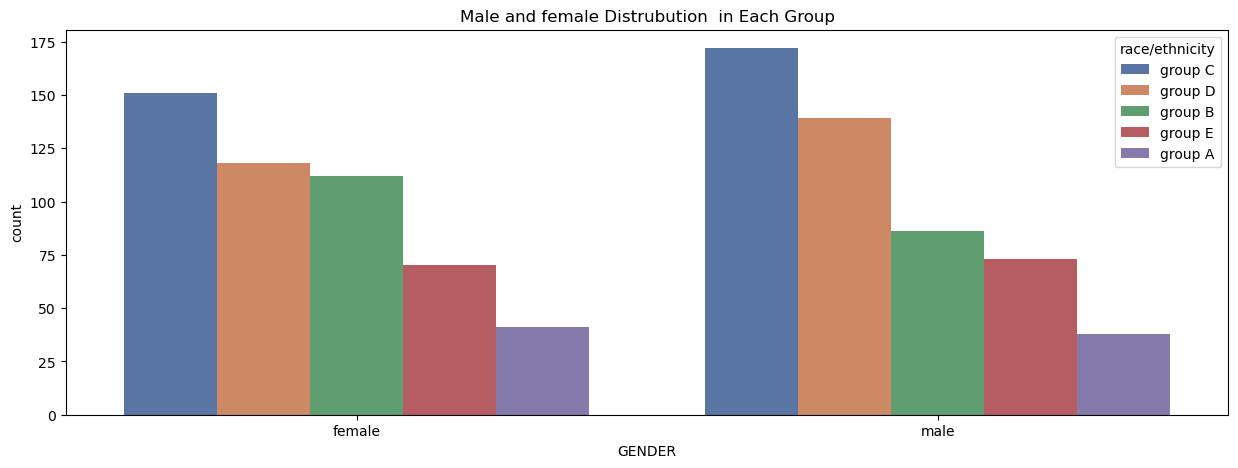

In [55]:
plt.subplots(figsize=(15,5))
plt.title("Male and female Distrubution  in Each Group")
sns.barplot(data=x,x='GENDER',y='count',hue='race/ethnicity',palette='deep')
plt.show()

In [56]:
x=data.groupby(['GENDER'])['parental level of education'].value_counts().reset_index()
x

,GENDER,parental level of education,count
0,female,high school,116
1,female,some college,106
2,female,associate's degree,101
3,female,some high school,84
4,female,bachelor's degree,52
5,female,master's degree,33
6,male,some college,118
7,male,associate's degree,103
8,male,high school,99
9,male,some high school,93


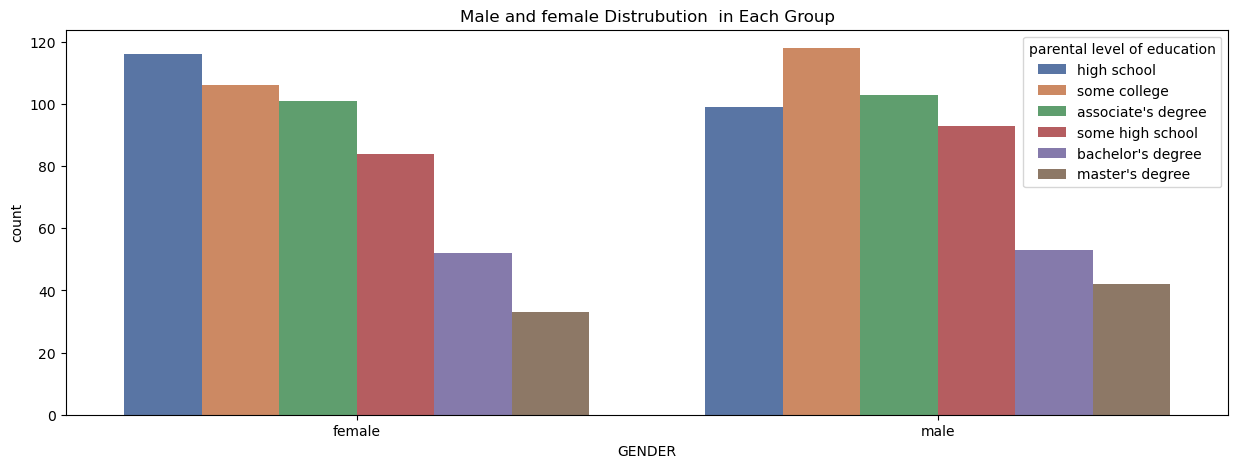

In [57]:
plt.subplots(figsize=(15,5))
plt.title("Male and female Distrubution  in Each Group")
sns.barplot(data=x,x='GENDER',y='count',hue='parental level of education',palette='deep')
plt.show()

In [58]:
data.head(1)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207


**How many male and female complete their course** 

In [59]:
x=data.groupby(['GENDER'])['test preparation course'].value_counts().reset_index()
x

,GENDER,test preparation course,count
0,female,none,315
1,female,completed,177
2,male,none,341
3,male,completed,167


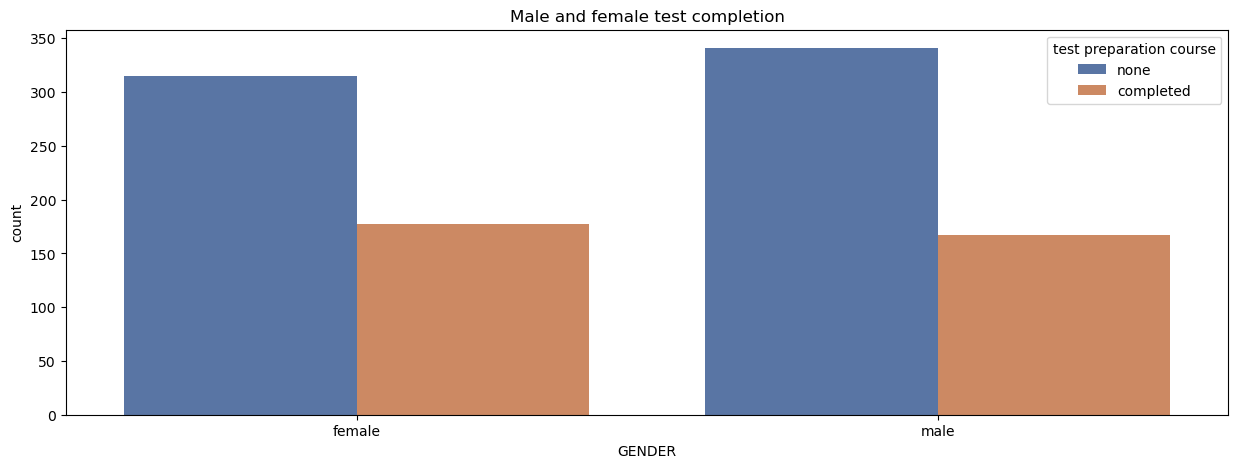

In [60]:
plt.subplots(figsize=(15,5))
plt.title("Male and female test completion")
sns.barplot(data=x,x='GENDER',y='count',hue='test preparation course',palette='deep')
plt.show()

In [61]:
data.head()

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,some college,free/reduced,none,57,76,77,210
3,male,group B,some college,free/reduced,none,70,70,63,203
4,female,group D,associate's degree,standard,none,83,85,86,254


In [62]:
x=data.groupby(['GENDER'])['lunch'].value_counts().reset_index()
x

,GENDER,lunch,count
0,female,standard,321
1,female,free/reduced,171
2,male,standard,339
3,male,free/reduced,169


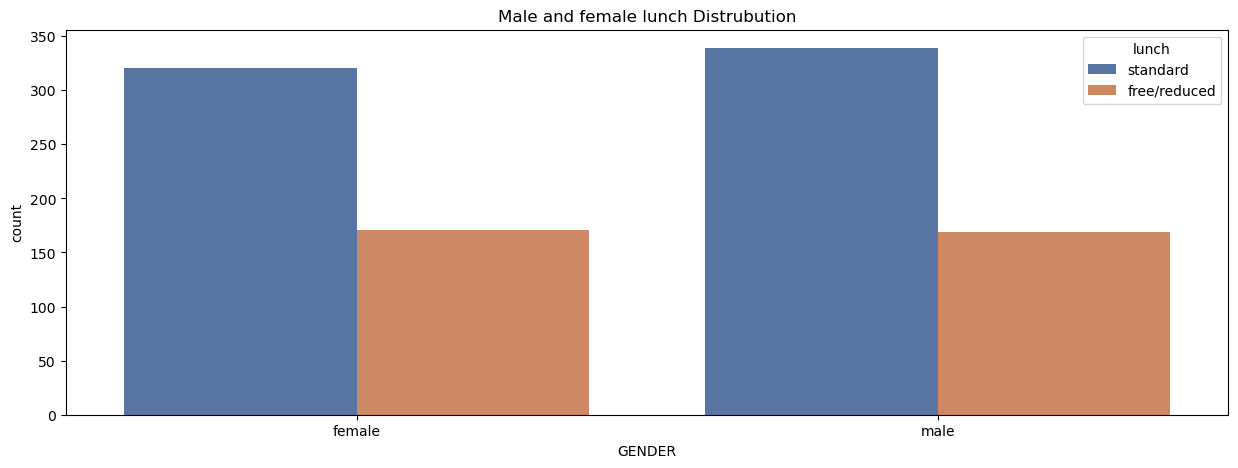

In [63]:
plt.subplots(figsize=(15,5))
plt.title("Male and female lunch Distrubution")
sns.barplot(data=x,x='GENDER',y='count',hue='lunch',palette='deep')
plt.show()

In [64]:
data.head(1)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207


In [65]:
x=data.groupby(['GENDER'])['test preparation course'].value_counts().reset_index()
x

,GENDER,test preparation course,count
0,female,none,315
1,female,completed,177
2,male,none,341
3,male,completed,167


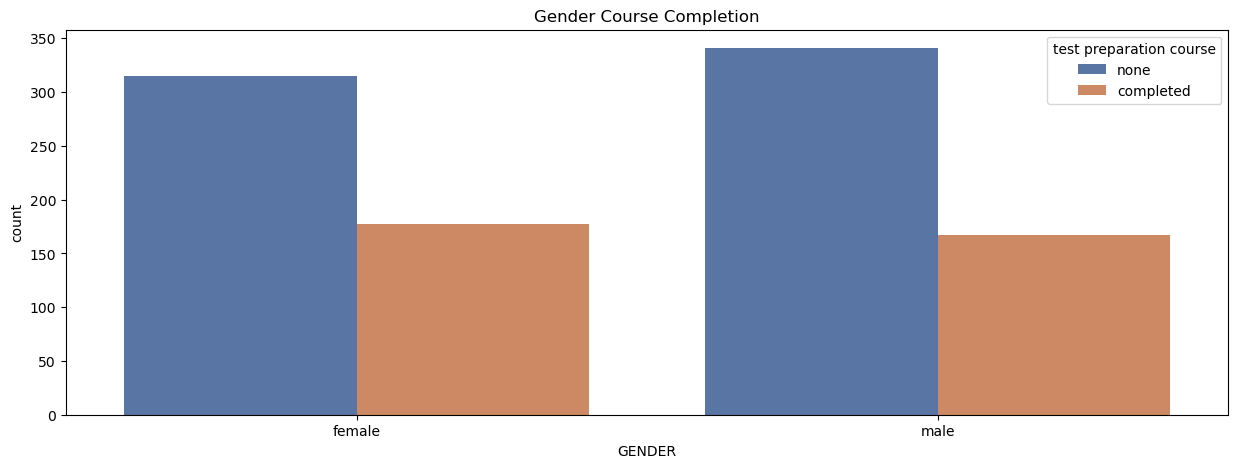

In [66]:
fig,ax=plt.subplots(figsize=(15,5))
plt.title("Gender Course Completion")
sns.barplot(data=x,x='GENDER',y='count',hue='test preparation course',palette='deep')
plt.show()

# Num-Num

In [67]:
data.head(1)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207


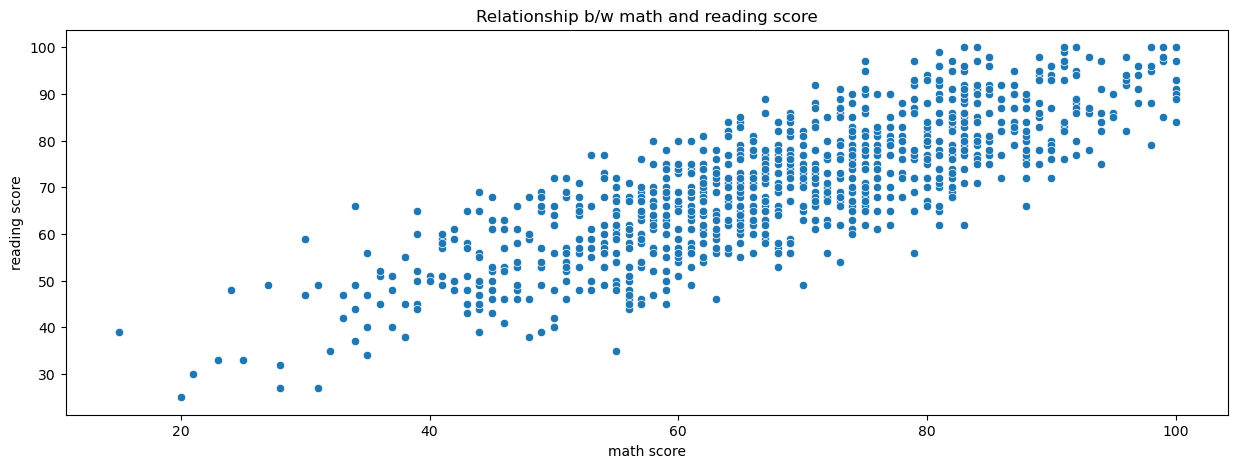

In [68]:
fig,ax=plt.subplots(figsize=(15,5))
plt.title("Relationship b/w math and reading score")
sns.scatterplot(data=data,x='math score',y='reading score')
plt.show()

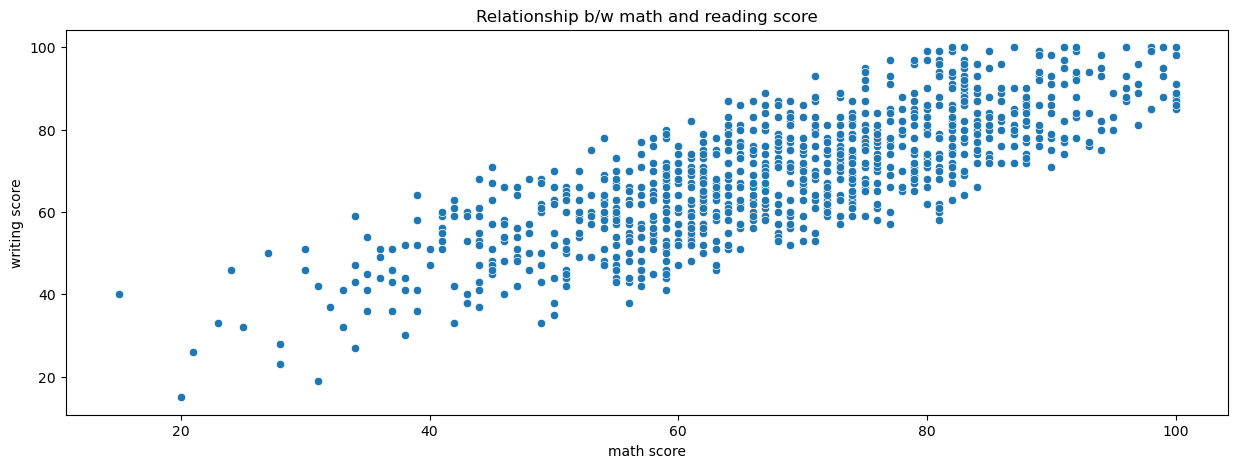

In [69]:
fig,ax=plt.subplots(figsize=(15,5))
plt.title("Relationship b/w math and reading score")
sns.scatterplot(data=data,x='math score',y='writing score')
plt.show()

# Num-Cat

In [70]:
data.head()

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276
2,female,group D,some college,free/reduced,none,57,76,77,210
3,male,group B,some college,free/reduced,none,70,70,63,203
4,female,group D,associate's degree,standard,none,83,85,86,254


In [71]:
# sns.relplot(data=data,x='math score',y='reading score',hue='gender',)

In [72]:
x=data.groupby(['GENDER'])['math score'].mean().reset_index()
x

,GENDER,math score
0,female,64.77439
1,male,70.75000


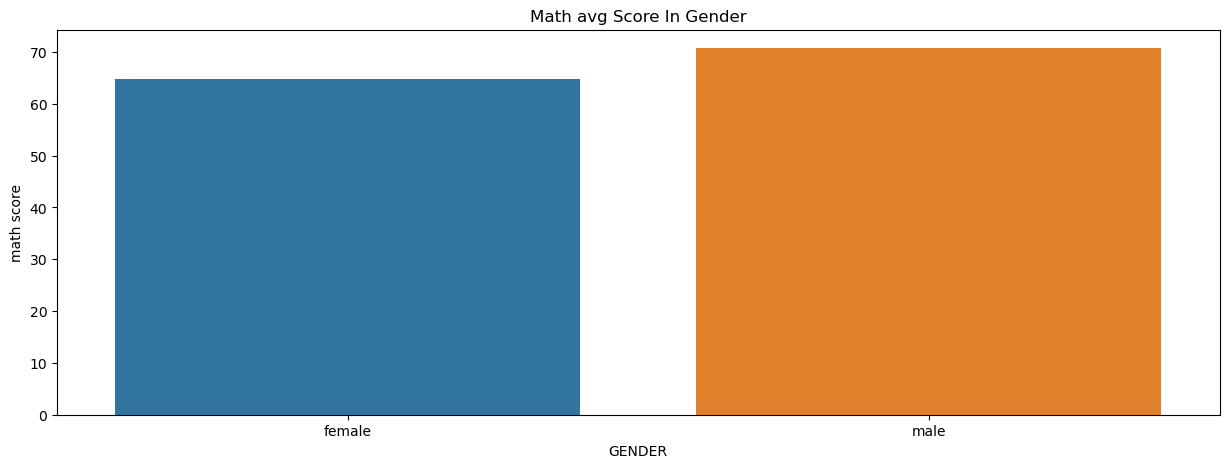

In [73]:
fig,ax=plt.subplots(figsize=(15,5))
plt.title("Math avg Score In Gender")
sns.barplot(data=x,x='GENDER',y='math score')
plt.show()

In [74]:
x=data.groupby(['GENDER'])['writing score'].mean().reset_index()
x

,GENDER,writing score
0,female,73.439024
1,male,64.976378


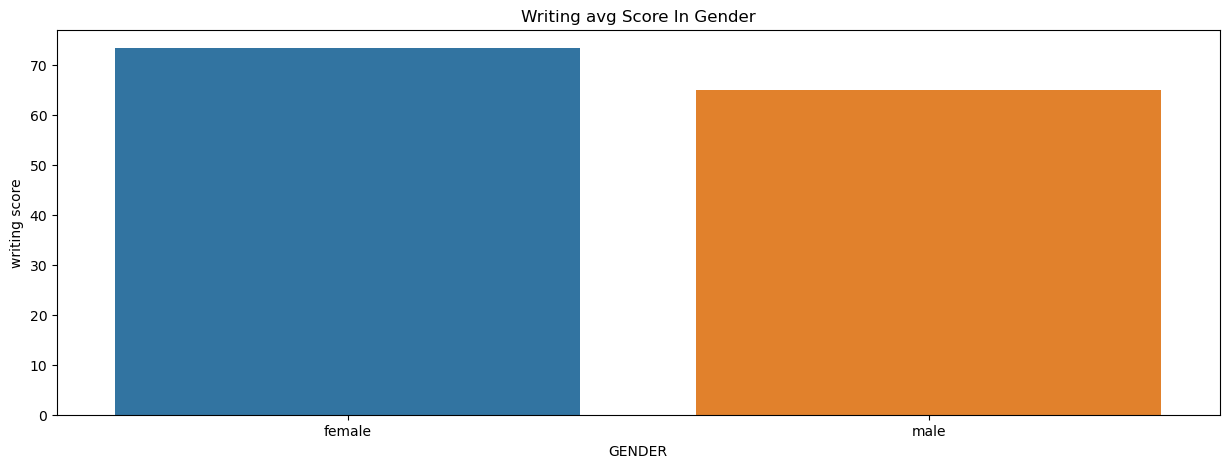

In [75]:
fig,ax=plt.subplots(figsize=(15,5))
plt.title("Writing avg Score In Gender")
sns.barplot(data=x,x='GENDER',y='writing score')
plt.show()

In [76]:
x=data.groupby(['GENDER'])['reading score'].mean().reset_index()
x

,GENDER,reading score
0,female,73.473577
1,male,67.387795


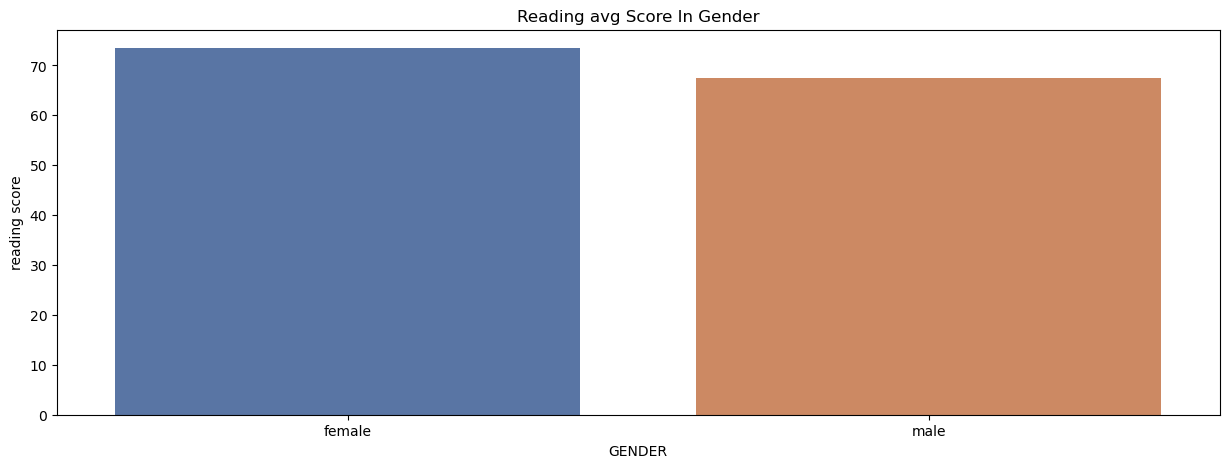

In [77]:
fig,ax=plt.subplots(figsize=(15,5))
plt.title("Reading avg Score In Gender")
sns.barplot(data=x,x='GENDER',y='reading score',palette='deep')
plt.show()

In [78]:
data.head(2)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276


In [79]:
x=data.groupby(['race/ethnicity'])['reading score'].mean().reset_index()
x

,race/ethnicity,reading score
0,group A,69.202532
1,group B,68.530303
2,group C,68.609907
3,group D,70.929961
4,group E,76.615385


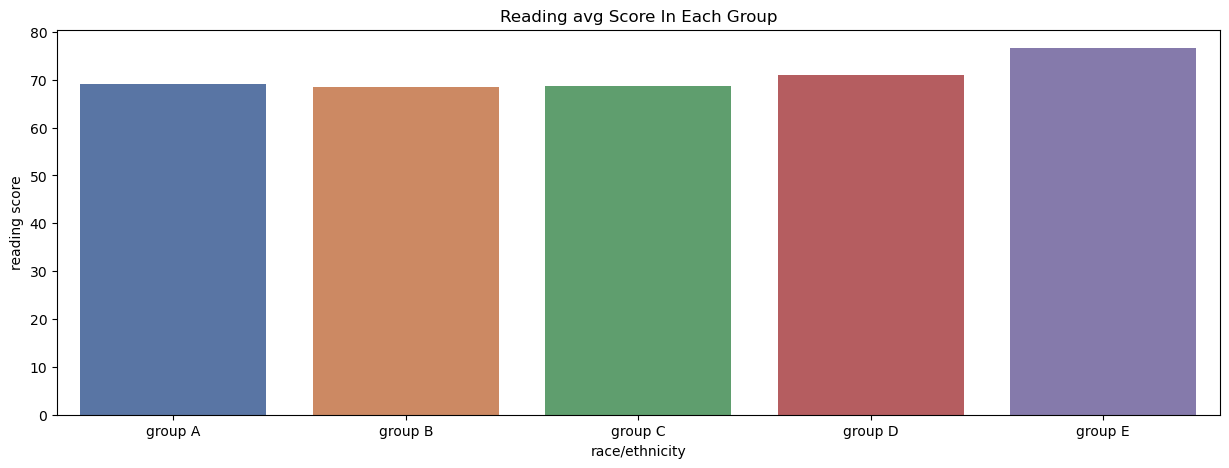

In [80]:
fig,ax=plt.subplots(figsize=(15,5))
plt.title("Reading avg Score In Each Group")
sns.barplot(data=x,x='race/ethnicity',y='reading score',palette='deep')
plt.show()

In [81]:
data.head(1)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207


In [82]:
x=data.groupby(['parental level of education'])['math score'].mean().reset_index()
x

,parental level of education,math score
0,associate's degree,70.348039
1,bachelor's degree,69.866667
2,high school,65.381395
3,master's degree,71.026667
4,some college,68.642857
5,some high school,64.197740


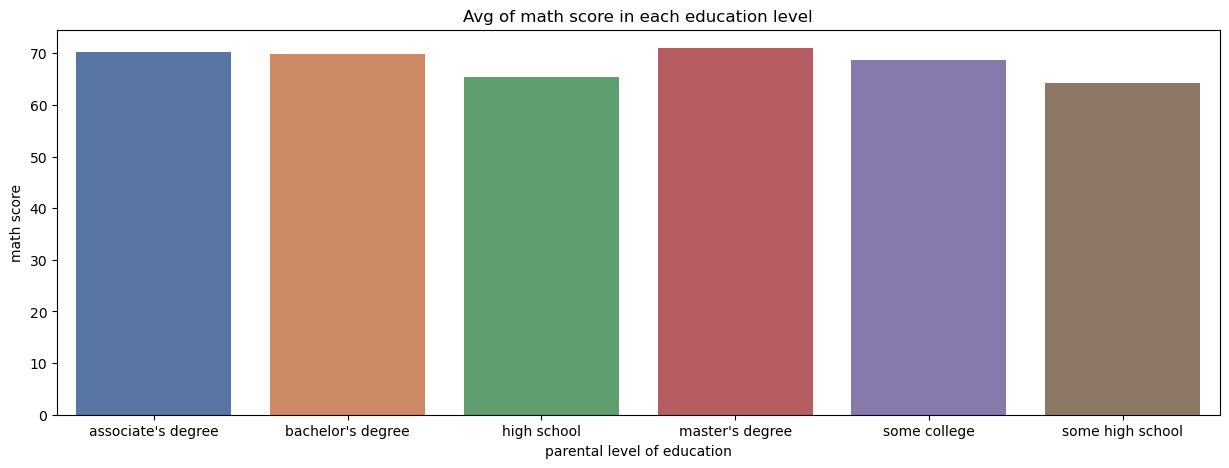

In [83]:
fig,ax=plt.subplots(figsize=(15,5))
plt.title("Avg of math score in each education level")
sns.barplot(data=x,x='parental level of education',y='math score',palette='deep')
plt.show()

In [84]:
data.head(2)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276


**math Mean Score of Male and Female in Each grop**

In [85]:
x=data.groupby(['GENDER','race/ethnicity'])['math score'].mean().reset_index()
x

,GENDER,race/ethnicity,math score
0,female,group A,62.951220
1,female,group B,62.267857
2,female,group C,63.019868
3,female,group D,63.838983
4,female,group E,75.214286
5,male,group A,68.657895
6,male,group B,66.418605
7,male,group C,67.697674
8,male,group D,73.158273
9,male,group E,79.547945


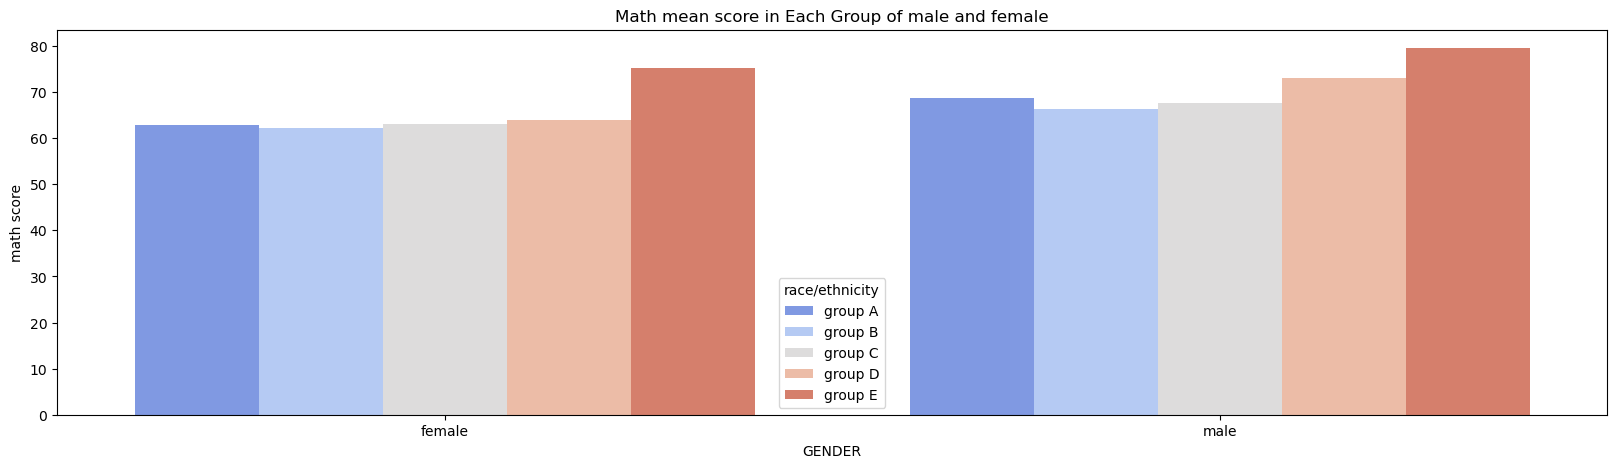

In [135]:
fig,ax=plt.subplots(figsize=(20,5))
plt.title("Math mean score in Each Group of male and female")
sns.barplot(data=x,x='GENDER',y='math score',hue='race/ethnicity',palette='coolwarm')
plt.show()

# Mult-Variate Analyiss

In [87]:
data.head(2)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276


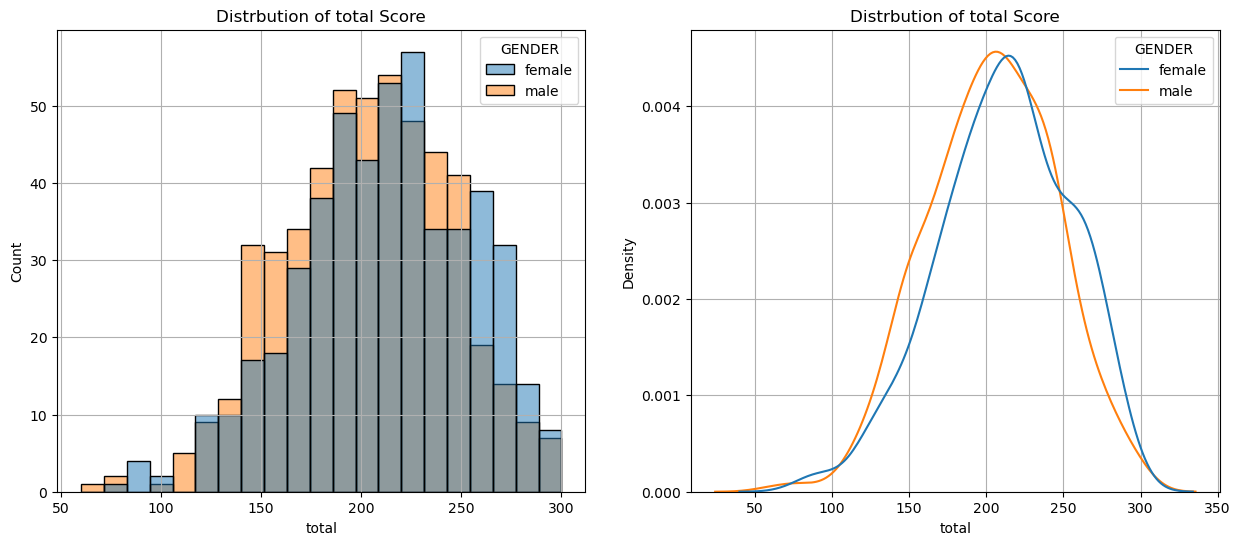

In [100]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,6))
ax1.set_title("Distrbution of total Score")
sns.histplot(x='total',hue='GENDER',data=data,ax=ax1)
ax1.grid()

ax2.set_title("Distrbution of total Score")
sns.kdeplot(x='total',hue='GENDER',data=data,ax=ax2)
ax2.grid()

In [102]:
data.head(2)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276


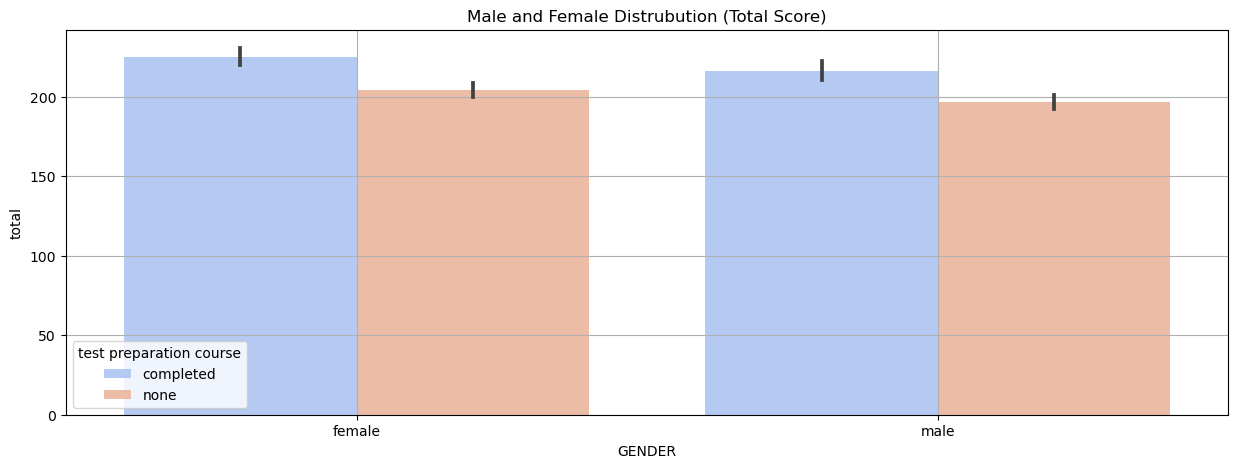

In [136]:
fig,ax1=plt.subplots(figsize=(15,5))
ax1.set_title("Male and Female Distrubution (Total Score)")
sns.barplot(data=data,x='GENDER',y='total',hue='test preparation course',palette='coolwarm')
ax1.grid()

In [111]:
data.head(1)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207


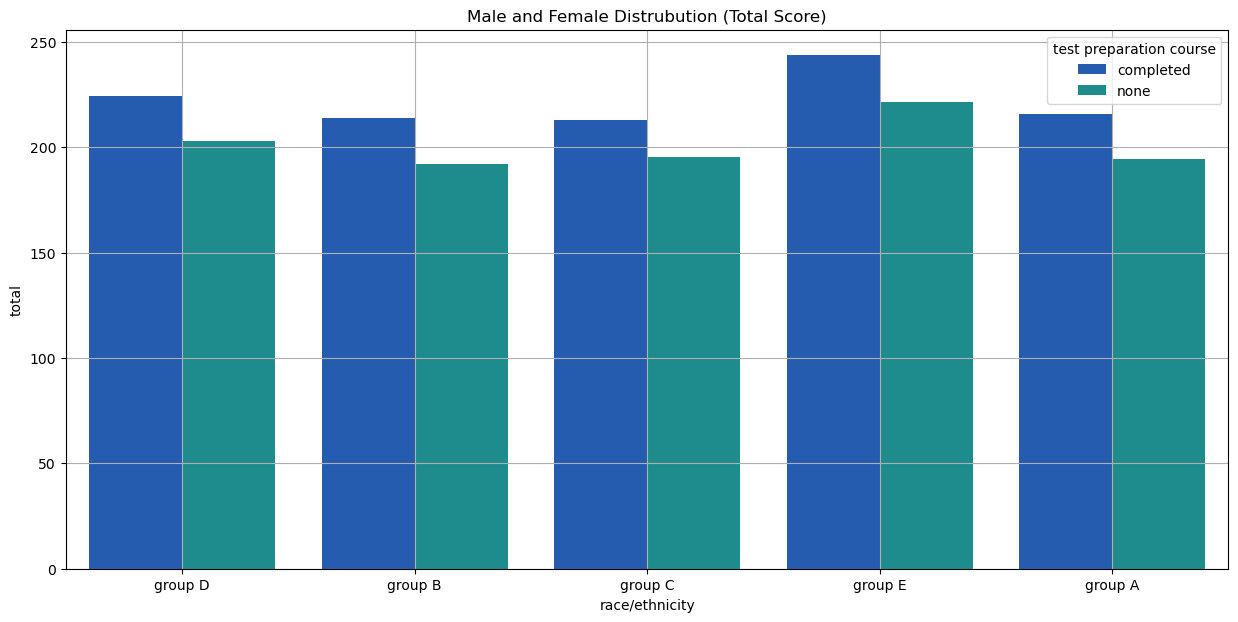

In [120]:
fig,ax1=plt.subplots(figsize=(15,7))
ax1.set_title("Male and Female Distrubution (Total Score)")
sns.barplot(data=data,x='race/ethnicity',
            y='total',hue='test preparation course',
            saturation=0.65,errorbar=None,
            palette='winter')
ax1.grid()

# Correlation Matrix

In [121]:
data.head(2)

,GENDER,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total
0,female,group D,some college,standard,completed,59,70,78,207
1,male,group D,associate's degree,standard,none,96,93,87,276


In [124]:
cor=data.select_dtypes('number').corr()

<Axes: title={'center': 'Corelation matrix'}>

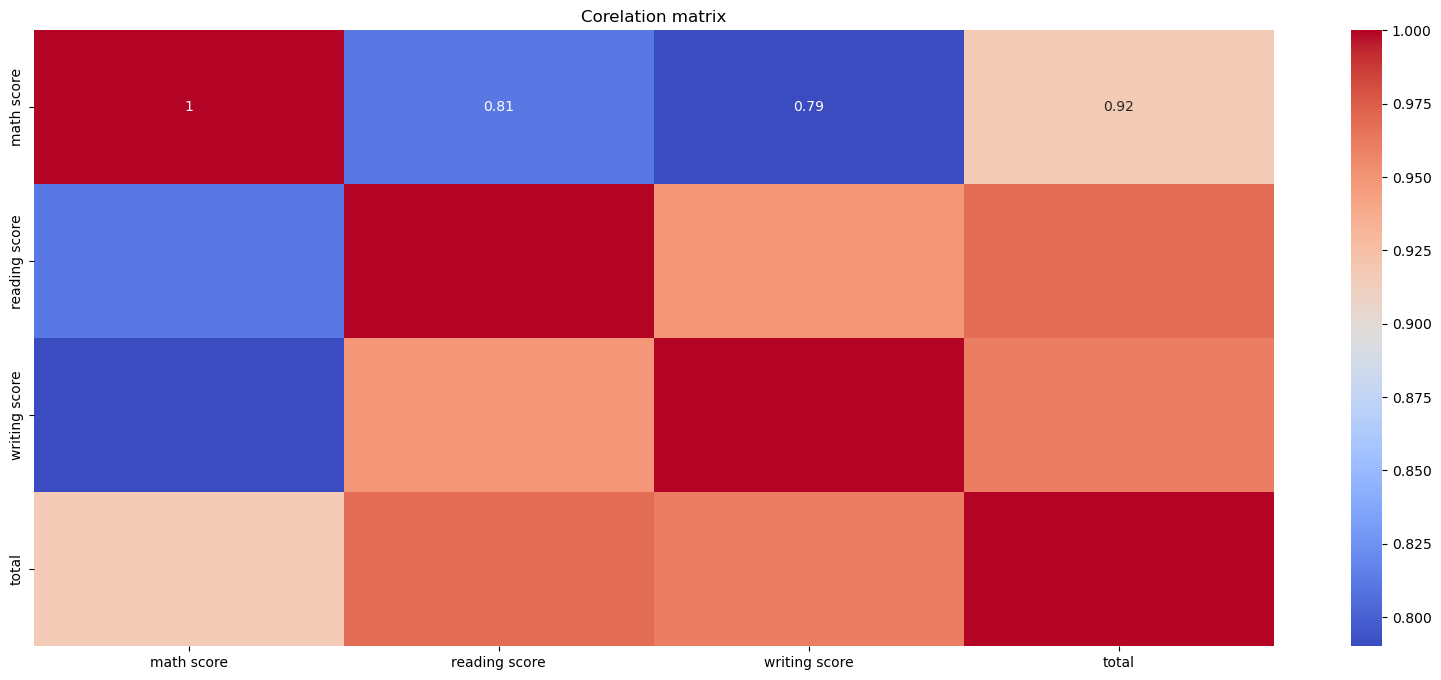

In [134]:
fig,ax=plt.subplots(figsize=(20,8))
ax.set_title("Corelation matrix")
sns.heatmap(cor,cmap='coolwarm',annot=True,ax=ax)